In [1]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import datetime 
import os 
import cv2
import open3d as o3d

In [10]:
# get the angles for dense lidar 
velo_path = "/home/divyanshu/3d_detection/AIO/aiodrive_lidar_denselv1_mini/lidar_denselv1"

velo_frame_1 = np.fromfile(os.path.join(velo_path,"000003.bin"), dtype=np.float32).reshape((-1,4))
#velo_frame_2 = np.fromfile(os.path.join(velo_path,"000002.bin"), dtype=np.float32).reshape((-1,4))


# load the points and remove reflectance, convert to homogenous 
points_1 = velo_frame_1[:, 0:3]
velo_1 = np.insert(points_1,3,1,axis=1).T

# take only the front FOV 
velo_1 = np.delete(velo_1,np.where(velo_1[0,:]<0),axis=1)
x = velo_1[0,:]
y = velo_1[1,:]
z = velo_1[2,:]

# convert cartesian coordinates into spherical coordinates and calculate phi and theta
phi = np.arccos((z/np.sqrt(x*x + y*y + z*z)))
theta = np.arctan(y/x)
r = np.sqrt(x*x + y*y + z*z)

/home/divyanshu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/divyanshu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


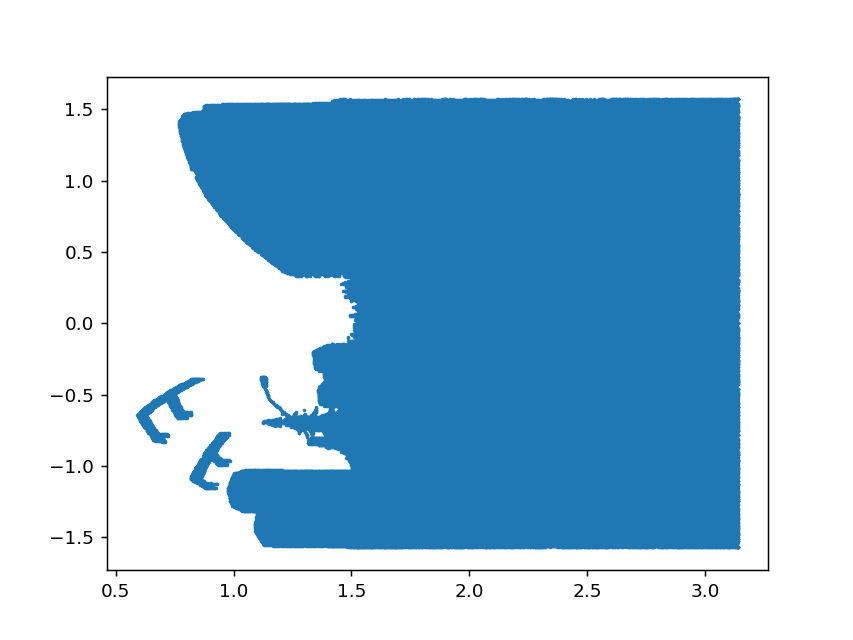

In [2]:
# get the angles for cepton lidar 
pcd = o3d.io.read_point_cloud("2/100.pcd")
cepton_arr = np.asarray(pcd.points)  

x_cepton = cepton_arr.T[0,:]
y_cepton = cepton_arr.T[1,:]
z_cepton = cepton_arr.T[2,:]

phi_cepton = np.arccos((z_cepton/np.sqrt(x_cepton*x_cepton + y_cepton*y_cepton + z_cepton*z_cepton)))
nan_index = ~np.isnan(phi_cepton)

theta_cepton = np.arctan(x_cepton/y_cepton)
nan_index_theta = ~np.isnan(theta_cepton)

r_cepton = np.sqrt(x_cepton*x_cepton + y_cepton*y_cepton + z_cepton*z_cepton)
nan_index_r = ~np.isnan(r_cepton)



filtered_phi_cepton = phi_cepton[nan_index]
filtered_theta_cetpton = theta_cepton[nan_index_theta]
filtered_r_cepton = r_cepton[nan_index_theta]


/home/divyanshu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/divyanshu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


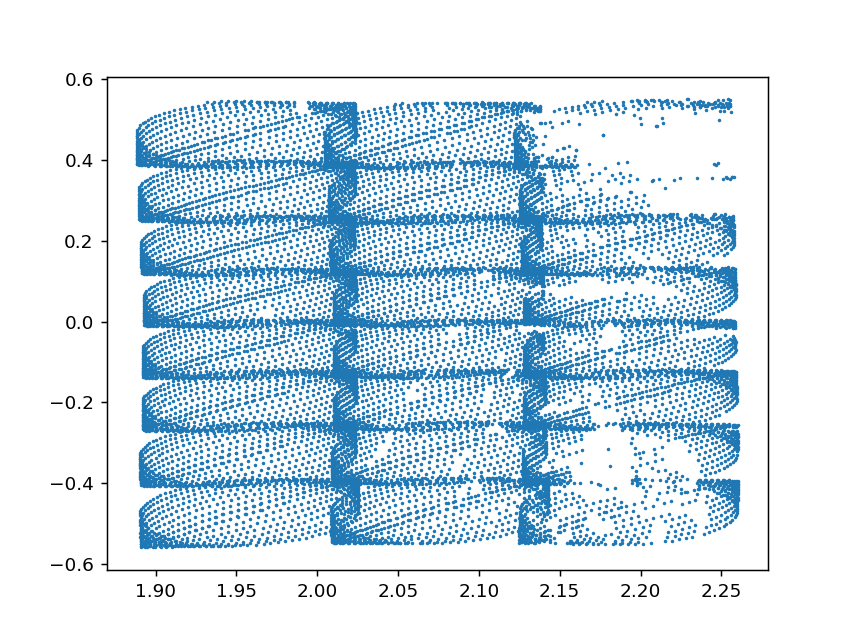

In [3]:
#plt.scatter(phi, theta, s=0.8)
plt.scatter(filtered_phi_cepton+0.5, filtered_theta_cetpton, s=0.8)
plt.show()

In [15]:
# align the point clouds 

diff = 0.5
filtered_phi_cepton = filtered_phi_cepton + diff
# dont change the filtered_theta_cepton 

index = theta>min(filtered_theta_cetpton)
index2 = theta<max(filtered_theta_cetpton)
final_index = index&index2


new_theta = theta[final_index]
new_phi = phi[final_index]
new_r = r[final_index]

new_index = new_phi<max(filtered_phi_cepton)
new_index2 = new_phi>min(filtered_phi_cepton)
final_new_index = new_index&new_index2

new_theta = new_theta[final_new_index]
new_phi = new_phi[final_new_index]
new_r = new_r[final_new_index]

<IPython.core.display.Javascript object>


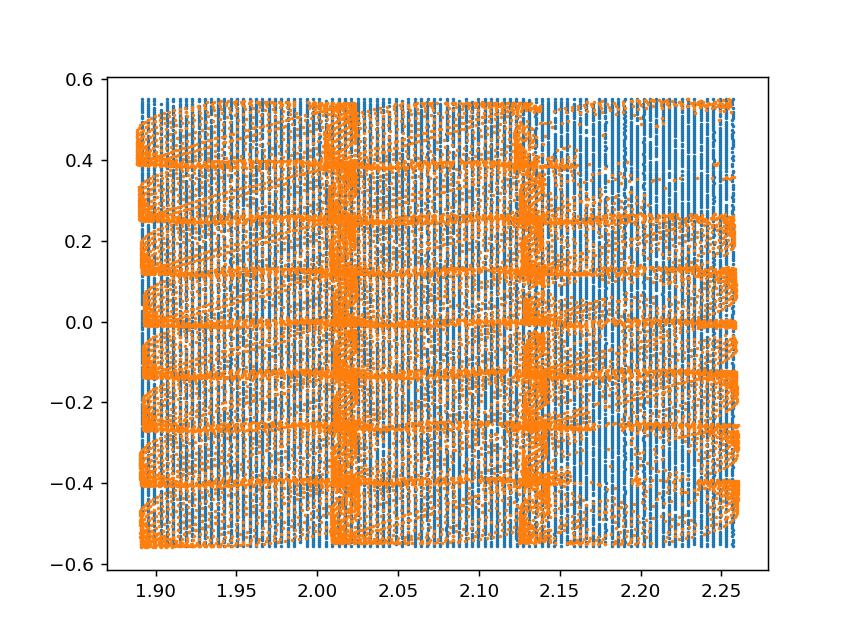

In [16]:
#plt.scatter(new_phi, new_theta, s=0.8)
plt.scatter(filtered_phi_cepton, filtered_theta_cetpton, s=0.8)
plt.show()

In [19]:
# sample the cepton point cloud from velodyne point cloud 

# round the angles to 2 decimal of cepton data
rounded_phi = np.round(new_phi,3)
rounded_theta = np.round(new_theta,3)
# now take the unique angles 
unique_phi = np.unique(rounded_phi)
unique_theta = np.unique(rounded_theta)


# the closest point transformation (shift the values to closest neighbour)
transformed_theta = []
transformed_phi = []

for each_theta in filtered_theta_cetpton:
    idx = (np.abs(unique_theta - each_theta)).argmin()
    closest_theta = unique_theta[idx]
    transformed_theta.append(closest_theta)
    #print(each_theta, closest_theta)
    
for each_phi in filtered_phi_cepton:
    idx = (np.abs(unique_phi - each_phi)).argmin()
    closest_phi = unique_phi[idx]
    transformed_phi.append(closest_phi)
    #print(each_phi, closest_phi)

<IPython.core.display.Javascript object>


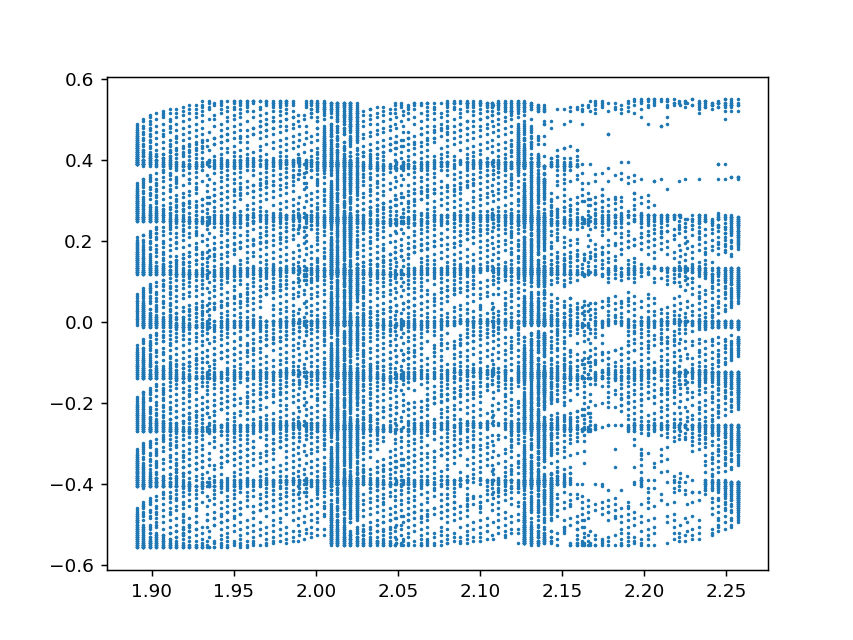

In [20]:
plt.scatter(transformed_phi, transformed_theta, s=0.8)
plt.show()